# WeRateDogs Analysis


## Table of Contents
- [Introduction](#intro)
- [Gather Data](#gather)
- [Assess](#assess)
- [Clean](#clean)
- [Storing data on SQL Database](#storing)
- [Insights and Visualization](#insights)
- [Conclusion](#conclusion)
- [References](#references)


<a id='intro'></a>
### Introduction

[WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs) is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because ["they're good dogs Brent."](http://knowyourmeme.com/memes/theyre-good-dogs-brent) WeRateDogs has over 4 million followers and has received international media coverage.

In this project I will wrangle the data from various sources, assess the data for qualitya and tideness issuess and give you insights into some of the interesting facts related to WeRateDogs.

<a id='gather'></a>
### Gather Data

- I have gathered the data form multiple sources, the tweet archive of WeRateDogs of 2017 which contains almost 6000 tweets. It can be found in the twitter_archive_enhanced.csv file. 
- Image predictions of the dog breed taken form the Udacity Server form this [Link](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)
- The retweet and favourite data related to the tweets collected using Twitter API.

In [15]:
# importing the libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests
import os

% matplotlib inline

> Gather Twitter Archive file of WeRateDogs

In [5]:
twitter_archive = pd.read_csv('./twitter-archive-enhanced.csv')

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> Gather the prediction file from udacity server which is hosted on this link https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [16]:
# download file and save it to image_predictions.tsv

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

res = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(res.content)

In [17]:
# load the tsv file to pandas dataframe
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> Gather the retweet and favourite data from twitter API

In [23]:
# Please don't run this cell if you don't have credentials stored 
# in credentials.py which are the API keys and tokens from Twitter

import credentials
import tweepy
import json

consumer_key = credentials.API_KEY
consumer_secret_key = credentials.API_SECRET_KEY
access_token = credentials.ACCESS_TOKEN
access_token_secret = credentials.ACCESS_TOKEN_SECRET

auth = tweepy.OAuthHandler(consumer_key, consumer_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(), wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

> The below cell took 25 minutes to run so, take a walk or grab a snack and come after 25 minutes

In [30]:
# get all the tweets from twitter_archive.tweet_id
list_of_tweets = []

error_encountered_ids = []

for tweet_id in twitter_archive.tweet_id:
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except:
        error_encountered_ids.append(tweet_id)
        print(f'Error on : {tweet_id}')

Error on : 888202515573088257
Error on : 873697596434513921
Error on : 872668790621863937
Error on : 872261713294495745
Error on : 869988702071779329
Error on : 866816280283807744
Error on : 861769973181624320
Error on : 856602993587888130
Error on : 851953902622658560
Error on : 845459076796616705
Error on : 844704788403113984
Error on : 842892208864923648
Error on : 837366284874571778
Error on : 837012587749474308
Error on : 829374341691346946
Error on : 827228250799742977
Error on : 812747805718642688
Error on : 802247111496568832
Error on : 779123168116150273
Error on : 775096608509886464
Error on : 771004394259247104
Error on : 770743923962707968
Error on : 759566828574212096
Rate limit reached. Sleeping for: 444
Error on : 754011816964026368
Error on : 680055455951884288
Rate limit reached. Sleeping for: 699


In [31]:
print('Total fetched tweets :', len(list_of_tweets))
print('Total Errors on fetches :', len(error_encountered_ids))

Total fetched tweets : 2331
Total Errors on fetches : 25


In [35]:
# save it to file name tweet_json.txt

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(list_of_tweets, indent=4))

In [188]:
# load the tweet_json.txt data into a pandas dataframe

tweet_data = pd.read_json('tweet_json.txt')

tweet_data.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",36347,False,NaN,892420643555336193,892420643555336192,...,NaN,NaN,NaN,7733,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,31317,False,NaN,892177421306343426,892177421306343424,...,NaN,NaN,NaN,5727,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,23590,False,NaN,891815181378084864,891815181378084864,...,NaN,NaN,NaN,3789,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",39655,False,NaN,891689557279858688,891689557279858688,...,NaN,NaN,NaN,7901,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,37848,False,NaN,891327558926688256,891327558926688256,...,NaN,NaN,NaN,8520,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [189]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
entities                         2331 non-null object
extended_entities                1816 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  2331 non-null bool
lang                             2331 no

> From the tweet json data we only need retweet counts and favourites counts
 Also, counts of only those ids which are in our twitter archive data as we don't\
 want data which we do not need but we will later address it in tidiness issues

In [43]:
# lets save the dataframes we got to a temp folder so we
# don't have to do all the processing again if we somehow lose it

twitter_archive.to_csv('./temp/twitter_archive.csv', index=False, encoding='utf-8')
image_predictions.to_csv('./temp/image_predictions.csv', index=False, encoding='utf-8')

In [190]:
tweet_data.to_csv('./temp/tweet_data.csv', index=False, encoding='utf-8')

<a id='assess'></a>
### Assess Data
  
  
**Twitter Archive :**
- Quality Issues
    - Empty values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, Some missing values in expanded URLs
    - Column with 835246439529840640 is having 0 as denominator
    - Change timestamp type to datetime
    - Unnecessary columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,
    retweeted_status_timestamp not needed for analysis, source
    - Unvalid names in name column like None, a, etc


- Tideness Issues
    - The doggo, floofer, pupper puppo are in different colums instead of single column
    - New column 'rating' which will be calculated as rating_numerator/rating_denominator

**Image Prediction :**
- Quality Issues
    - Images with no prediction of dogs, pl_dog, p2_dog, p3_dog are false, total 324 such rows exists
    - Underscores present in dog breed prediction names.
    - Invalid names like terrapin, suit which are not dog breed exists
    - dog breed names are not standardized, sometimes first letter is capitalized sometimes lower


- Tideness Issues
    - Make a single column with dog breed and place the max prediction dog beed there
    - Combine Image prediction and twitter archive dataframe

**Tweets data from API :**
- Quality Issues

    - Columns which are not necessary for analysis are present

- Tideness Issues
    - Combine tweet data and twitter archive dataframe


#### Visual assessment : Archive

In [191]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Programmatic assessment : Archive

In [192]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [193]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [194]:
# denominators as zero
twitter_archive[(twitter_archive.rating_denominator <= 0)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [195]:
twitter_archive[twitter_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [196]:
# check a source column for HTML a tag
twitter_archive.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [197]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Daisy          7
Buddy          7
Bailey         7
Toby           7
an             7
Oscar          6
Milo           6
Stanley        6
Leo            6
Jack           6
Dave           6
Koda           6
Bella          6
Scout          6
Rusty          6
Jax            6
Sammy          5
            ... 
Rudy           1
Batdog         1
Andru          1
Jebberson      1
Furzey         1
Pumpkin        1
Jeffri         1
Chubbs         1
Molly          1
Bookstore      1
Stewie         1
Godzilla       1
Ralphus        1
Richie         1
Noah           1
Carper         1
Monkey         1
Emmie          1
Oddie          1
Stu            1
Iggy           1
Superpup       1
Spark          1
Hall           1
Jazz           1
Strider        1
Angel          1
Jonah         

In [198]:
twitter_archive.name.isna().sum()

0

#### Visual assessment : Image Prediction

In [55]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Programmatic assessment : Image Prediction

In [56]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [61]:
image_predictions[image_predictions.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [79]:
# duplicate images
image_predictions[image_predictions.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [74]:
# images with no dogs
image_predictions.query('p1_dog == False & p2_dog == False & p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


#### Visual assessment : Tweet data from API

In [57]:
tweet_data

,id,favorite_count,retweet_count
0,892420643555336193,36347,7733
1,892177421306343426,31317,5727
2,891815181378084864,23590,3789
3,891689557279858688,39655,7901
4,891327558926688256,37848,8520
5,891087950875897856,19065,2852
6,890971913173991426,11104,1857
7,890729181411237888,61248,17260
8,890609185150312448,26235,3931
9,890240255349198849,29973,6726


#### Programmatic assessment : Tweet data from API

In [62]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [63]:
tweet_data[tweet_data.duplicated()]

,id,favorite_count,retweet_count


<a id='clean'></a>
### Clean Data

In this part we will clean to data.

In [82]:
twitter_archive = pd.read_csv('./temp/twitter_archive.csv')
image_predictions = pd.read_csv('./temp/image_predictions.csv')
tweet_data = pd.read_csv('./temp/tweet_data.csv')

In [83]:
# Make the copy of data

tweets_archive_copy = twitter_archive.copy()
images_preds_copy = image_predictions.copy()
tweets_data_copy = tweet_data.copy()

1.
- Define  
    - Remove in tweets_archive the row with tweet_id 835246439529840640 as it is having 0 as denominator
- Code

In [84]:
tweets_archive_copy = tweets_archive_copy[tweets_archive_copy.tweet_id != 835246439529840640]

- Test

In [85]:
(tweets_archive_copy.tweet_id == 835246439529840640).sum()

0

2.

- Define
    - Change the timestamp type to datetime in tweets_archive_copy

- Code

In [86]:
tweets_archive_copy['timestamp'] = pd.to_datetime(tweets_archive_copy.timestamp)

- Test

In [87]:
tweets_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2355 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2355 non-null datetime64[ns]
source                        2355 non-null object
text                          2355 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2355 non-null int64
rating_denominator            2355 non-null int64
name                          2355 non-null object
doggo                         2355 non-null object
floofer                       2355 non-null object
pupper                        2355 non-null object
puppo                         2355 non-null object
dtypes: datetime64[ns](1

3.
- Define
    - Change None and a to in tweets_archive_copy.name to 'Unknown'

- Code

In [88]:
unvalid_names = ['None', 'a']

for unvalid_name in unvalid_names:
    tweets_archive_copy.name = tweets_archive_copy.name.replace(unvalid_name, 'Unknown')

- Test

In [89]:
tweets_archive_copy.name.value_counts()

Unknown      799
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
Bailey         7
Toby           7
Buddy          7
Daisy          7
an             7
Koda           6
Scout          6
Dave           6
Jax            6
Jack           6
Stanley        6
Bella          6
Rusty          6
Oscar          6
Milo           6
Leo            6
Alfie          5
very           5
            ... 
Bradley        1
Jay            1
Meatball       1
Furzey         1
Ike            1
Al             1
Rooney         1
Pippin         1
Huxley         1
Pete           1
Lizzie         1
Ashleigh       1
Rodman         1
Combo          1
Blu            1
Rupert         1
Adele          1
Hector         1
Naphaniel      1
Georgie        1
Siba           1
Kendall        1
Dewey          1
Sweet          1
Tuck           1
Lassie         1
Peanut         1
Duddles       

4.

- Define
    - Drop columns which are not necessary. Namely, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

- Code

In [90]:
tweets_archive_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'source'], axis=1, inplace=True)

- Test

In [91]:
tweets_archive_copy.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


5.

- Define
    - Remove underscore from the prediction names using str.replace function of pandas

- Code

In [92]:
images_preds_copy.p1 = images_preds_copy.p1.str.replace('_', ' ')
images_preds_copy.p2 = images_preds_copy.p2.str.replace('_', ' ')
images_preds_copy.p3 = images_preds_copy.p3.str.replace('_', ' ')

- Test

In [93]:
images_preds_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


6.

- Define
    - Make new column for breed and combine the results of p1, p2, p3 and store the values form pl_dog, p2_dog, p3_dog

- Code

In [94]:
images_preds_copy['breed'] = 'Unknown'

for i, row in images_preds_copy.iterrows():

    if row.p1_dog:
        images_preds_copy.set_value(i, 'breed', row.p1)
    elif row.p2_dog :
        images_preds_copy.set_value(i, 'breed', row.p2)
    elif row.p3_dog :
        images_preds_copy.set_value(i, 'breed', row.p3)
    else:
        images_preds_copy.set_value(i, 'breed', 'Unknown')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


- Test

In [95]:
images_preds_copy.breed.value_counts()

Unknown                           324
golden retriever                  173
Labrador retriever                113
Pembroke                           96
Chihuahua                          95
pug                                65
toy poodle                         52
chow                               51
Samoyed                            46
Pomeranian                         42
malamute                           34
cocker spaniel                     34
French bulldog                     32
Chesapeake Bay retriever           31
miniature pinscher                 26
Cardigan                           23
Eskimo dog                         22
Staffordshire bullterrier          22
beagle                             21
German shepherd                    21
Siberian husky                     20
Shih-Tzu                           20
Shetland sheepdog                  19
Maltese dog                        19
kuvasz                             19
Rottweiler                         19
Lakeland ter

7.

- Define
    - Remove unnecessary columns from the image_pred_copy using pandas drop function
- Code

In [96]:
images_preds_copy.drop(['img_num' ,'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog','p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

- Test

In [97]:
images_preds_copy.head()

,tweet_id,jpg_url,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher


8.

- Define
    - Capitalize the first letter of breed name and rest lower using pandas lower() and capitalize() functions
- Code

In [98]:
images_preds_copy.breed = images_preds_copy.breed.str.lower().str.capitalize()

- Test

In [99]:
images_preds_copy.breed.value_counts()

Unknown                           324
Golden retriever                  173
Labrador retriever                113
Pembroke                           96
Chihuahua                          95
Pug                                65
Toy poodle                         52
Chow                               51
Samoyed                            46
Pomeranian                         42
Malamute                           34
Cocker spaniel                     34
French bulldog                     32
Chesapeake bay retriever           31
Miniature pinscher                 26
Cardigan                           23
Staffordshire bullterrier          22
Eskimo dog                         22
Beagle                             21
German shepherd                    21
Siberian husky                     20
Shih-tzu                           20
Lakeland terrier                   19
Shetland sheepdog                  19
Kuvasz                             19
Rottweiler                         19
Maltese dog 

9.

- Define
    - Remove Ids which are not in archive from the tweet_data_copy
- Code


In [100]:
tweets_data_copy = tweets_data_copy[['id', 'favorite_count', 'retweet_count']]

- Test

In [101]:
tweets_data_copy.head()

,id,favorite_count,retweet_count
0,892420643555336193,36347,7733
1,892177421306343426,31317,5727
2,891815181378084864,23590,3789
3,891689557279858688,39655,7901
4,891327558926688256,37848,8520


10.

- Define
    - Combine the doggo	floofer	pupper	puppo into a single column. Here we can not use melt function as, it is not fixed that dog belongs to one of the typed it has None values too and after melting when we remove the values which are not needed then None can not be removed.
    - Drop the columns with doggo, floofer, pupper, puppo

- Code

In [102]:
tweets_archive_copy['dog_type'] = 'None'
for i, row in tweets_archive_copy.iterrows():

    if row.doggo == 'doggo':
        tweets_archive_copy.set_value(i, 'dog_type', 'duggo')
    elif row.floofer == 'floofer':
        tweets_archive_copy.set_value(i, 'dog_type', 'floofer')
    elif row.pupper == 'pupper':
        tweets_archive_copy.set_value(i, 'dog_type', 'pupper')
    elif row.puppo == 'puppo':
        tweets_archive_copy.set_value(i, 'dog_type', 'puppo')
    else:
        tweets_archive_copy.set_value(i, 'dog_type', 'None')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a fut

In [103]:
tweets_archive_copy.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None


In [104]:
tweets_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

- Test

In [105]:
tweets_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2355 non-null int64
timestamp             2355 non-null datetime64[ns]
text                  2355 non-null object
expanded_urls         2297 non-null object
rating_numerator      2355 non-null int64
rating_denominator    2355 non-null int64
name                  2355 non-null object
dog_type              2355 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 245.6+ KB


11.

- Define
    - Merge the tweet archive and image_predictions using inner join
- Code

In [106]:
tweets_archive_copy = pd.merge(tweets_archive_copy, images_preds_copy, on = ['tweet_id'], how='inner')

- Test

In [107]:
tweets_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 10 columns):
tweet_id              2075 non-null int64
timestamp             2075 non-null datetime64[ns]
text                  2075 non-null object
expanded_urls         2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  2075 non-null object
dog_type              2075 non-null object
jpg_url               2075 non-null object
breed                 2075 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 178.3+ KB


12.

- Define
    - Merge the tweets_archive and tweet_data into single tabe using inner join operation
    
- Code

In [108]:
# first we need to rename the id column name to tweet_id
tweets_data_copy.rename(columns={'id':'tweet_id'}, inplace=True)
tweets_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [109]:
tweets_archive_copy = pd.merge(tweets_archive_copy, tweets_data_copy, on = ['tweet_id'], how='inner')

- Test

In [110]:
tweets_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 12 columns):
tweet_id              2059 non-null int64
timestamp             2059 non-null datetime64[ns]
text                  2059 non-null object
expanded_urls         2059 non-null object
rating_numerator      2059 non-null int64
rating_denominator    2059 non-null int64
name                  2059 non-null object
dog_type              2059 non-null object
jpg_url               2059 non-null object
breed                 2059 non-null object
favorite_count        2059 non-null int64
retweet_count         2059 non-null int64
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 209.1+ KB


13.

- Define
    - Make new columnn rating which will be calculated as rating_numerator/rating_denominator
- Code

In [111]:
tweets_archive_copy['rating'] = (tweets_archive_copy['rating_numerator']*1.0)/tweets_archive_copy['rating_denominator']

- Test

In [112]:
tweets_archive_copy.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,breed,favorite_count,retweet_count,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,36347,7733,1.3
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,31317,5727,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,23590,3789,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador retriever,39655,7901,1.3
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,37848,8520,1.2


<a id='storing'></a>
### Storing Data on a SQL Database

> The Complete wrangling process is not done untill the cleaned data is stored safely. So here we will store the data in a SQL Database as well as in a master csv file

In [114]:
# lets first save it on a CSV file
tweets_archive_copy.to_csv('archive_master.csv', index=False, encoding='utf-8')

In [115]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///weratedogs.db')

In [117]:
# saving to the database
tweets_archive_copy.to_sql('master2', engine, index=False)

In [118]:
# gathering
df = pd.read_sql('SELECT * FROM master2', engine)

In [119]:
df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,breed,favorite_count,retweet_count,rating
0,892420643555336193,2017-08-01 16:23:56.000000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,36347,7733,1.3
1,892177421306343426,2017-08-01 00:17:27.000000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,31317,5727,1.3
2,891815181378084864,2017-07-31 00:18:03.000000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,23590,3789,1.2
3,891689557279858688,2017-07-30 15:58:51.000000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador retriever,39655,7901,1.3
4,891327558926688256,2017-07-29 16:00:24.000000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,37848,8520,1.2


<a id='insights'></a>
### Insights and Visualizations

**Highest Rated Dog breeds**

In [120]:
# remove outliers
df = df[df.rating <= 2]

In [121]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,rating
count,2.053000e+03,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000
mean,7.378102e+17,11.155869,10.518266,8010.747199,2593.790063,1.057942
std,6.762061e+16,8.498369,7.214838,12115.201612,4539.225593,0.218160
min,6.660209e+17,0.000000,2.000000,0.000000,11.000000,0.000000
25%,6.762374e+17,10.000000,10.000000,1520.000000,555.000000,1.000000
50%,7.110080e+17,11.000000,10.000000,3515.000000,1225.000000,1.100000
75%,7.929134e+17,12.000000,10.000000,10000.000000,2984.000000,1.200000
max,8.924206e+17,204.000000,170.000000,156892.000000,78185.000000,1.500000


In [122]:
# The golden retirver was getting unfair advantage because 
# of some outliers. After removing it the Bouvier des flandres came as the highest rated dog

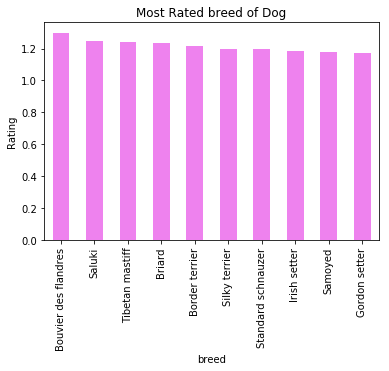

In [123]:
df.groupby('breed').rating.mean().sort_values(ascending=False)[0:10].plot(kind='bar', color='violet');
plt.ylabel('Rating');
plt.title('Most Rated breed of Dog');

Bouvier des flandres is the highest rated dog on average 

**Favourite Count vs Rating given**

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 0 to 2058
Data columns (total 13 columns):
tweet_id              2053 non-null int64
timestamp             2053 non-null object
text                  2053 non-null object
expanded_urls         2053 non-null object
rating_numerator      2053 non-null int64
rating_denominator    2053 non-null int64
name                  2053 non-null object
dog_type              2053 non-null object
jpg_url               2053 non-null object
breed                 2053 non-null object
favorite_count        2053 non-null int64
retweet_count         2053 non-null int64
rating                2053 non-null float64
dtypes: float64(1), int64(5), object(7)
memory usage: 224.5+ KB


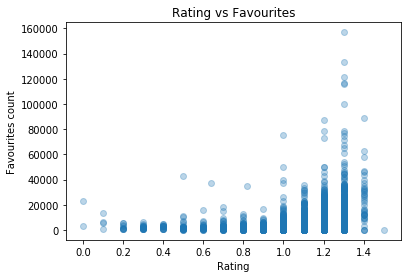

In [125]:
plt.scatter(df['rating'], df['favorite_count'], alpha=0.3);
plt.title('Rating vs Favourites');
plt.xlabel('Rating');
plt.ylabel('Favourites count');

We can observe a general trend that as the rating of a dog increases the Favourite counts also increases

**Most Common Dog names**

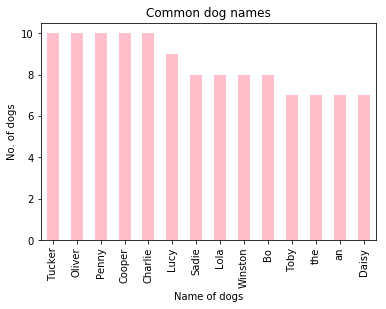

In [126]:
# Removed the bar with unknown on the plot
df.name.value_counts()[1:15].plot(kind='bar', color='pink');
plt.title('Common dog names');
plt.xlabel('Name of dogs');
plt.ylabel('No. of dogs');

Most common names for dogs are Tucker, Oliver, Penny, Cooper, Charlie

**Average Rating a dog receives**

In [17]:
df.rating.mean()

1.0579418146393305

The average rating is 1.0579 which is on a scale of 10 a good dog will likely get more than 10 rating

**Common Types of dogs**

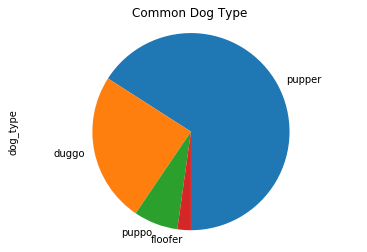

In [16]:
df.dog_type.value_counts()[1:].plot(kind='pie', startangle=-90, shadow=False);
plt.title('Common Dog Type');
plt.axis('equal');

So, the most common type of dog is pupper which means puppy

<a id='conclusion'></a>
### Conclusion

After analysing we got the following insighs :
1. The most common type of dog is pupper which means puppy
2. Most common names for dogs are Tucker, Oliver, Penny, Cooper, Charlie
3. There is a relation between rating and no. of favourites that as the rating of a dog increases the Favourite counts also increases
4. Bouvier des flandres is the highest rated dog on average
5. On average a dog receive a rating of 10.57 on a scale of 10

<a id='references'></a>
### References
- https://medium.com/@adamichelllle/exploring-twitter-api-and-data-using-tweepy-pandas-and-matplotlib-part-1-2ac07fcc4717  
- https://stackoverflow.com/questions/47925828/how-to-create-a-pandas-dataframe-using-tweepy
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
- https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html

In [18]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0